In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('c:/Users/tomas/Documents/Programación/Universidad/Patricionog/Datos/Paquetes')
import Foragio as fg
import Excelio as ex
import Framio as fr
import Stringio as st
import Listio as ls
import Graphio as gr

In [3]:
Path = 'J:/My Drive/Experimento/Plantillas finales/'
Base = '1. Generales - Original.xlsx'
Comparacion = '9. Generales - Desglosado en Tipo de candidato.xlsx'

df = pd.read_excel(Path + Base)
df2 = pd.read_excel(Path + Comparacion)

In [4]:
df_Conservador = pd.DataFrame({
    'Cambio_op_con': pd.concat([df['cambio_op_con_der'], df['cambio_op_con_izq']]),
    'Tipo_candidato_con': ['Derecha'] * len(df) + ['Izquierda'] * len(df)
})

df_Progresista = pd.DataFrame({
    'Cambio_op_pro': pd.concat([df['cambio_op_pro_der'], df['cambio_op_pro_izq']]),
    'Tipo_candidato_pro': ['Derecha'] * len(df) + ['Izquierda'] * len(df)
})

In [5]:

Columnas_A_Mantener = [
 'genero',
 'edad',
 'nacionalidad',
 'provincia',
 'e_social',
 'niv_educativo',
 'f_ingreso',
 'inmueble_res',
 'voto_2019',
 'voto_PASO_2023',
 'candidato_PASO_2023',
 'votara_2023',
 'afiliacion_pol',
 'autopercep_izq-der',
 'autopercep_conpro',
 'autopercep_perantiper',
 'cercania_Massa',
 'cercania_Milei',
 'cercania_Bregman',
 'cercania_Bullrich',
 'cercania_Schiaretti',
 'indice_positividad',
 'indice_progresismo',
 'indice_progresismo_tiempo',
 'indice_conservadurismo',
 'indice_conservadurismo_tiempo']

df = df[Columnas_A_Mantener]

df = df.reset_index(drop=True)
df_Conservador = df_Conservador.reset_index(drop=True)
df_Progresista = df_Progresista.reset_index(drop=True)

df = pd.concat([df, df_Conservador, df_Progresista], axis=1)

df.head()

df.to_excel(Path + '9. Ballotage - Desglosado en Tipo de candidato.xlsx', index=False)

In [6]:
Columnas_A_Mantener = [
 'genero',
 'edad',
 'nacionalidad',
 'provincia',
 'e_social',
 'niv_educativo',
 'f_ingreso',
 'inmueble_res',
 'voto_2019',
 'voto_PASO_2023',
 'candidato_PASO_2023',
 'votara_2023',
 'afiliacion_pol',
 'autopercep_izq-der',
 'autopercep_conpro',
 'autopercep_perantiper',
 'cercania_Massa',
 'cercania_Milei',
 'cercania_Bregman',
 'cercania_Bullrich',
 'cercania_Schiaretti',
 'indice_positividad',
 'indice_progresismo',
 'indice_progresismo_tiempo',
 'indice_conservadurismo',
 'indice_conservadurismo_tiempo',
 'Cambio_op_pro',
 'Cambio_op_con',
 'Tipo_candidato_pro', 
 'Tipo_candidato_con']

df = df[Columnas_A_Mantener]

In [7]:
df = fr.Replace_Values_In_Name_Columns(df, ['á', 'é', 'í', 'ó', 'ú', '-'], ['a', 'e', 'i', 'o', 'u', '_'])
df = fr.Casing_Column_Names(df, Separator = "_")

In [8]:
df = fr.Create_Dummy_Variables_In_All_DataFrame(df)
df = fr.Replace_Values_In_Name_Columns(df, ['á', 'é', 'í', 'ó', 'ú', '-', ' ', 'ñ'], ['a', 'e', 'i', 'o', 'u', '_', '_', 'ni'])
df = fr.Casing_Column_Names(df, Separator = "_")
df = fr.Replace_Values_In_Name_Columns(df, ['Ciudad_Autonoma_De_Buenos_Aires'], ['CABA'])

df.head()

,Edad,Autopercep_Izq_Der,Autopercep_Conpro,Autopercep_Perantiper,Cercania_Massa,Cercania_Milei,Cercania_Bregman,Cercania_Bullrich,Cercania_Schiaretti,Indice_Positividad,...,Candidato_Paso_2023_Juan_Grabois,Candidato_Paso_2023_Myriam_Bregman,Candidato_Paso_2023_Sergio_Massa,Candidato_Paso_2023_No_Aplica,Votara_2023_Si,Afiliacion_Pol_No,Tipo_Candidato_Pro_Derecha,Tipo_Candidato_Pro_Izquierda,Tipo_Candidato_Con_Derecha,Tipo_Candidato_Con_Izquierda
0,67.0,6.0,8.0,10.0,1.0,2.0,1.0,4.0,5.0,-1.142857,...,False,False,False,False,False,True,True,False,True,False
1,54.0,8.0,2.0,3.0,1.0,3.0,1.0,1.0,4.0,-0.571429,...,False,False,False,False,True,True,True,False,True,False
2,68.0,10.0,10.0,10.0,1.0,1.0,1.0,5.0,1.0,-0.857143,...,False,False,False,False,True,True,True,False,True,False
3,50.0,10.0,2.0,10.0,1.0,1.0,1.0,3.0,1.0,-1.142857,...,False,True,False,False,True,True,True,False,True,False
4,37.0,6.0,5.0,6.0,1.0,3.0,1.0,5.0,3.0,-0.571429,...,False,False,False,True,False,True,True,False,True,False


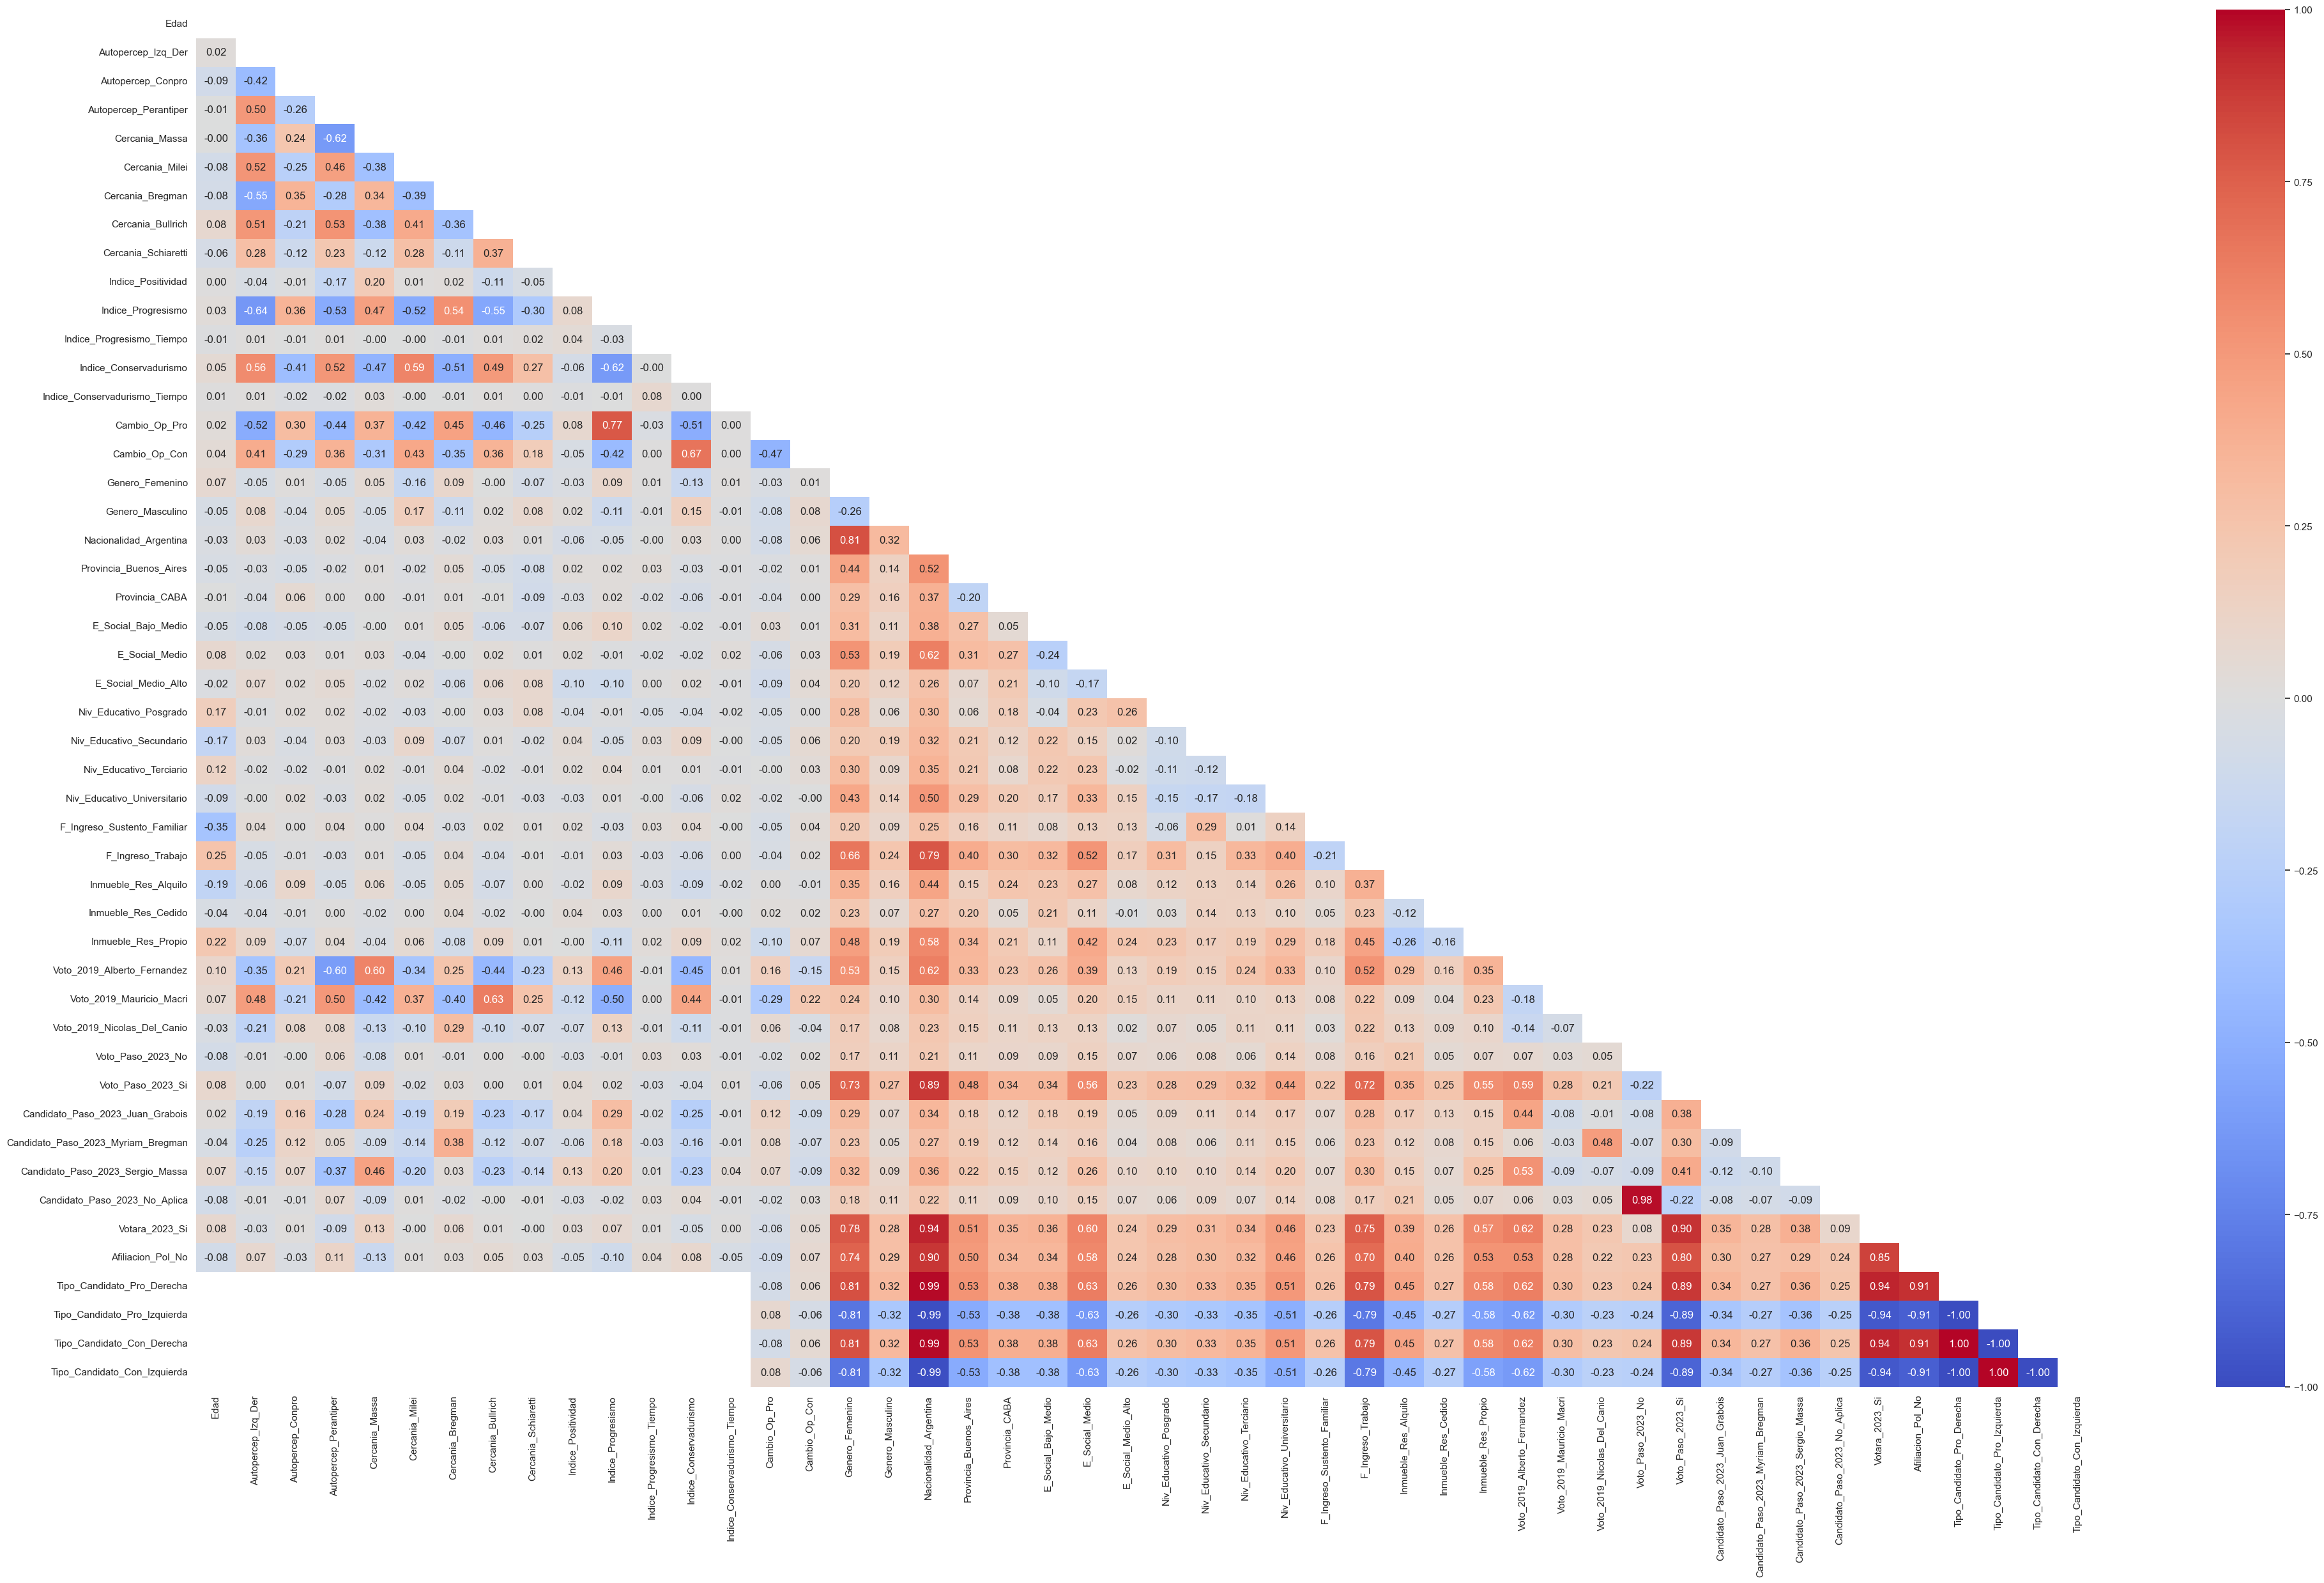

In [9]:
gr.Correlation_Heatmap(df, Figure_Size = (48,28), Correlation_Method= 'pearson')